# Limpieza de datos 

Este trabajo de análisis de calidad de datos identifica y diagnostica cinco problemáticas críticas en el dataset de terremotos y tsunamis, incluyendo valores nulos en variables esenciales, coordenadas geográficas inválidas, valores atípicos en mediciones sísmicas, registros duplicados e inconsistencias entre variables relacionadas como CDI y MMI. Mediante un análisis exploratorio se busca limpiar y validar el dataset para garantizar la confiabilidad de futuros análisis sísmicos y modelos predictivos, estableciendo las bases para insights más precisos sobre la relación entre terremotos y tsunamis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar archivo
df = pd.read_csv('C:/Users/laura/Downloads/earthquake_data_tsunami.csv')

print(df.head()) 

   magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1        6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2        7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3        7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4        6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   

   Year  Month  tsunami  
0  2022     11        1  
1  2022     11        0  
2  2022     11        1  
3  2022     11        1  
4  2022     11        1  


In [2]:
print(df.columns) 

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')


# 1. Valores nulos o ceros en columnas críticas

In [3]:
print("Valores nulos/ceros en columnas críticas")
print("Valores nulos por columna:")
print(df.isnull().sum())

print("\nValores iguales a 0 en columnas numéricas importantes:")
ceros_analysis = {}
columnas_numericas = ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth']
for col in columnas_numericas:
    if col in df.columns:
        ceros_count = (df[col] == 0).sum()
        ceros_analysis[col] = ceros_count
        print(f"{col}: {ceros_count} ceros ({ceros_count/len(df)*100:.2f}%)")



Valores nulos/ceros en columnas críticas
Valores nulos por columna:
magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

Valores iguales a 0 en columnas numéricas importantes:
magnitude: 0 ceros (0.00%)
cdi: 212 ceros (27.11%)
mmi: 0 ceros (0.00%)
sig: 0 ceros (0.00%)
nst: 365 ceros (46.68%)
dmin: 405 ceros (51.79%)
gap: 70 ceros (8.95%)
depth: 0 ceros (0.00%)


# 2. Variables de fecha (Year y Month)

In [4]:
# Crear columna de fecha combinada
df["date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str) + "-01")
print("\nColumna 'date' creada correctamente.")
display(df[["Year", "Month", "date"]].head())


Columna 'date' creada correctamente.


,Year,Month,date
0,2022,11,2022-11-01
1,2022,11,2022-11-01
2,2022,11,2022-11-01
3,2022,11,2022-11-01
4,2022,11,2022-11-01


# 3. Inconsistencias en datos de coordenadas

In [5]:
print("Análisis de coordenadas geográficas:")

# Verificar rangos válidos para latitud y longitud
lat_min, lat_max = df['latitude'].min(), df['latitude'].max()
lon_min, lon_max = df['longitude'].min(), df['longitude'].max()

print(f"Latitud: [{lat_min}, {lat_max}]")
print(f"Longitud: [{lon_min}, {lon_max}]")

# Identificar coordenadas potencialmente incorrectas
coordenadas_sospechosas = df[(df['latitude'] < -90) | (df['latitude'] > 90) |
    (df['longitude'] < -180) | (df['longitude'] > 180)]

print(f"\nCoordenadas fuera de rangos geográficos válidos: {len(coordenadas_sospechosas)}")


Análisis de coordenadas geográficas:
Latitud: [-61.8484, 71.6312]
Longitud: [-179.968, 179.662]

Coordenadas fuera de rangos geográficos válidos: 0


# 4. Valores atípicos en mediciones sísmicas


Valores atípicos en mediciones


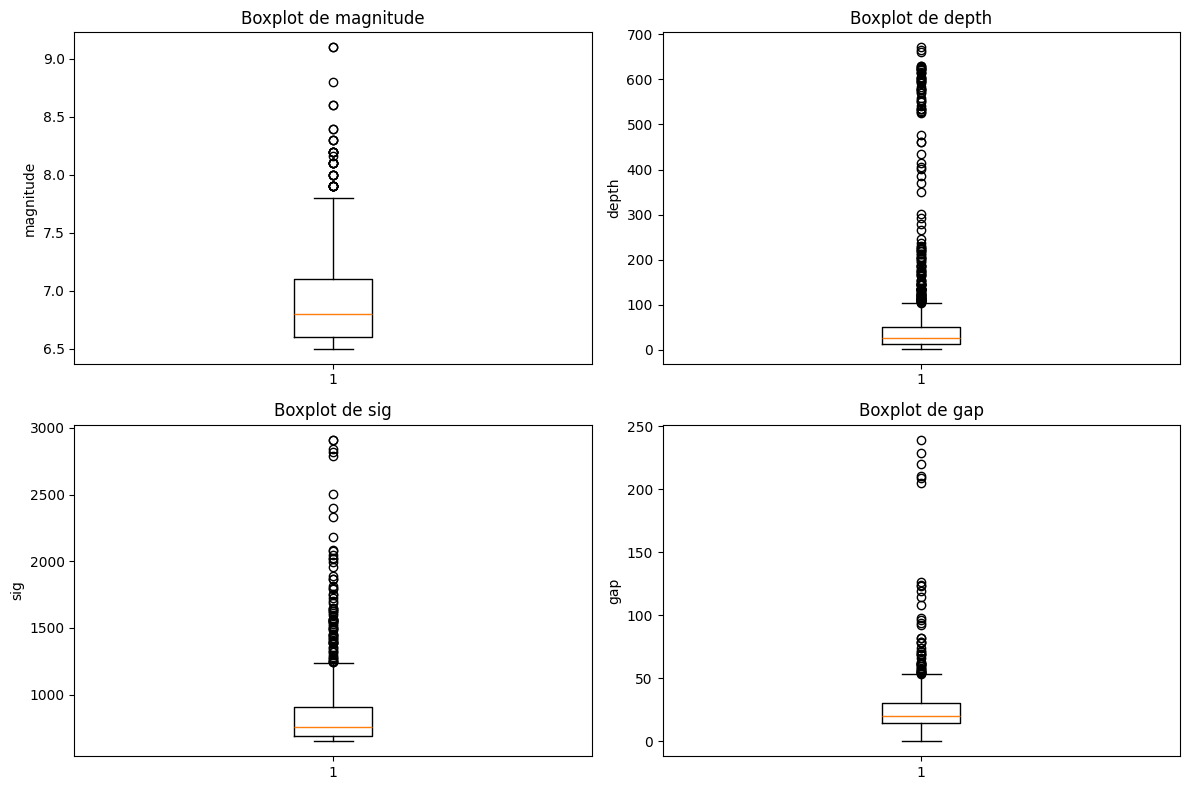


Valores extremos por variable:
magnitude: 37 valores atípicos
depth: 139 valores atípicos
sig: 73 valores atípicos
gap: 48 valores atípicos


In [6]:
print("\nValores atípicos en mediciones")

# Analizar distribuciones de variables clave
variables_analisis = ['magnitude', 'depth', 'sig', 'gap']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, col in enumerate(variables_analisis):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

# Identificar valores extremos
print("\nValores extremos por variable:")
for col in variables_analisis:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} valores atípicos")

# 5. Inconsistencias temporales y duplicados

In [7]:
print("\nProblemas temporales y duplicados")

# Verificar rango temporal
print("Rango temporal del dataset:")
print(f"Año mínimo: {df['Year'].min()}")
print(f"Año máximo: {df['Year'].max()}")

# Verificar meses válidos
meses_invalidos = df[(df['Month'] < 1) | (df['Month'] > 12)]
print(f"\nRegistros con meses inválidos: {len(meses_invalidos)}")

# Buscar duplicados exactos
duplicados_exactos = df.duplicated().sum()
print(f"Registros duplicados exactos: {duplicados_exactos}")

# Buscar duplicados potenciales (mismo tiempo, ubicación y magnitud similar)
df['time_location_key'] = df['Year'].astype(str) + '_' + df['Month'].astype(str) + '_' + df['latitude'].round(2).astype(str) + '_' + df['longitude'].round(2).astype(str)

duplicados_potenciales = df['time_location_key'].duplicated().sum()
print(f"Registros con misma fecha y ubicación: {duplicados_potenciales}")

# Mostrar algunos duplicados potenciales
if duplicados_potenciales > 0:
    print("\nEjemplo de registros potencialmente duplicados:")
    duplicados = df[df['time_location_key'].duplicated(keep=False)]
    print(duplicados[['Year', 'Month', 'latitude', 'longitude', 'magnitude']].head(6))


Problemas temporales y duplicados
Rango temporal del dataset:
Año mínimo: 2001
Año máximo: 2022

Registros con meses inválidos: 0
Registros duplicados exactos: 0
Registros con misma fecha y ubicación: 2

Ejemplo de registros potencialmente duplicados:
    Year  Month  latitude  longitude  magnitude
32  2022      1    52.502   -168.080        6.5
33  2022      1    52.502   -168.080        6.5
35  2022      1    52.480   -167.736        6.7
36  2022      1    52.480   -167.736        6.7


# 6. Inconsistencias en datos categóricos y tsunami 


Inconsistencias en datos categóricos
Distribución de tsunamis:
tsunami
0    478
1    304
Name: count, dtype: int64

Magnitud promedio por tsunami:
tsunami
0    6.942803
1    6.938487
Name: magnitude, dtype: float64

Inconsistencias CDI vs MMI:
Registros con diferencia > 3: 224

Datos disponibles para scatter plot: 782 registros


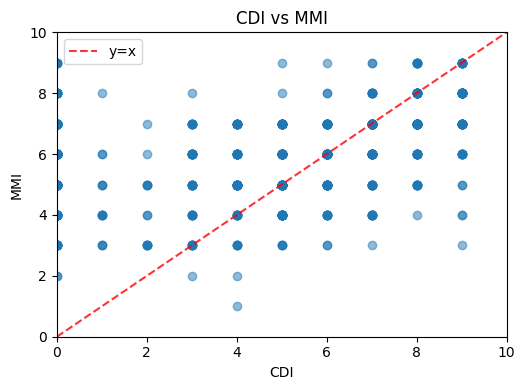


Problema: 224 registros tienen CDI y MMI inconsistentes


In [8]:
print("\nInconsistencias en datos categóricos")

# Análisis básico de la variable tsunami
print("Distribución de tsunamis:")
tsunami_counts = df['tsunami'].value_counts()
print(tsunami_counts)

# Relación simple entre magnitud y tsunami
print("\nMagnitud promedio por tsunami:")
magnitud_promedio = df.groupby('tsunami')['magnitude'].mean()
print(magnitud_promedio)

# Verificar inconsistencias entre CDI y MMI
print("\nInconsistencias CDI vs MMI:")
df['diff_cdi_mmi'] = abs(df['cdi'] - df['mmi'])
inconsistencias = df[df['diff_cdi_mmi'] > 3]
print(f"Registros con diferencia > 3: {len(inconsistencias)}")

# Verificar si hay datos para el scatter plot
cdi_mmi_data = df[['cdi', 'mmi']].dropna()
print(f"\nDatos disponibles para scatter plot: {len(cdi_mmi_data)} registros")

# Visualización 
plt.figure(figsize=(10, 4))

# Scatter plot CDI vs MMI 
plt.subplot(1, 2, 2)
if len(cdi_mmi_data) > 0:
    plt.scatter(cdi_mmi_data['cdi'], cdi_mmi_data['mmi'], alpha=0.5)
    plt.plot([0, 10], [0, 10], 'r--', alpha=0.8, label='y=x')
    plt.xlabel('CDI')
    plt.ylabel('MMI')
    plt.title('CDI vs MMI')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.legend()
else:
    plt.text(0.5, 0.5, 'No hay datos disponibles', 
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes)
    plt.title('CDI vs MMI - Sin datos')

plt.tight_layout()
plt.show()

print(f"\nProblema: {len(inconsistencias)} registros tienen CDI y MMI inconsistentes")

# 7. Revisión de tipo de dato

In [9]:
print("\nTipos de datos actuales:")
display(df.dtypes)

#convertir 'tsunami' a tipo categórico (Sí/No)
df["tsunami"] = df["tsunami"].map({1: "Sí", 0: "No"})
display(df["tsunami"].value_counts())


Tipos de datos actuales:


magnitude                   float64
cdi                           int64
mmi                           int64
sig                           int64
nst                           int64
dmin                        float64
gap                         float64
depth                       float64
latitude                    float64
longitude                   float64
Year                          int64
Month                         int64
tsunami                       int64
date                 datetime64[ns]
time_location_key            object
diff_cdi_mmi                  int64
dtype: object

tsunami
No    478
Sí    304
Name: count, dtype: int64